In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
import joblib
import matplotlib.pyplot as plt


In [2]:
# Load the data
data = pd.read_csv('data.csv')  # Replace with your actual data file path

# Feature columns (independent variables)
X = data[['temperature', 'gas', 'smoke', 'noise', 'vibration']]

# Target column (dependent variable)
y = data['fan_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Initialize models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, random_state=42),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(100,), random_state=42)
}


In [4]:
results = []

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision (Fan On)": report['1']['precision'],
        "Recall (Fan On)": report['1']['recall'],
        "F1-Score (Fan On)": report['1']['f1-score'],
        "Precision (Fan Off)": report['0']['precision'],
        "Recall (Fan Off)": report['0']['recall'],
        "F1-Score (Fan Off)": report['0']['f1-score']
    })
    
    # Optionally save each model
    joblib.dump(model, f'{name}_model.pkl')


In [5]:
comparison_df = pd.DataFrame(results)
comparison_df


,Model,Accuracy,Precision (Fan On),Recall (Fan On),F1-Score (Fan On),Precision (Fan Off),Recall (Fan Off),F1-Score (Fan Off)
0,RandomForest,1.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,XGBoost,0.998,0.993590,1.000000,0.996785,1.000000,0.997101,0.998549
2,Neural Network (MLP),0.867,0.991667,0.575806,0.728571,0.839634,0.997826,0.911921


In [6]:
# Save the comparison dataframe to a CSV file for future reference
comparison_df.to_csv('model_comparison_results.csv', index=False)


In [3]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [4]:
train_accuracies = []
test_accuracies = []

In [5]:
for epoch in range(1, 101):
    model.fit(X_train, y_train)  # Fit the model
    train_pred = model.predict(X_train)  # Predict on training data
    test_pred = model.predict(X_test)  # Predict on test data
    
    # Calculate accuracy for each epoch
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

In [6]:
print("Final Test Accuracy:", test_accuracies[-1])
print("Classification Report:\n", classification_report(y_test, test_pred))

Final Test Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1380
           1       1.00      1.00      1.00       620

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



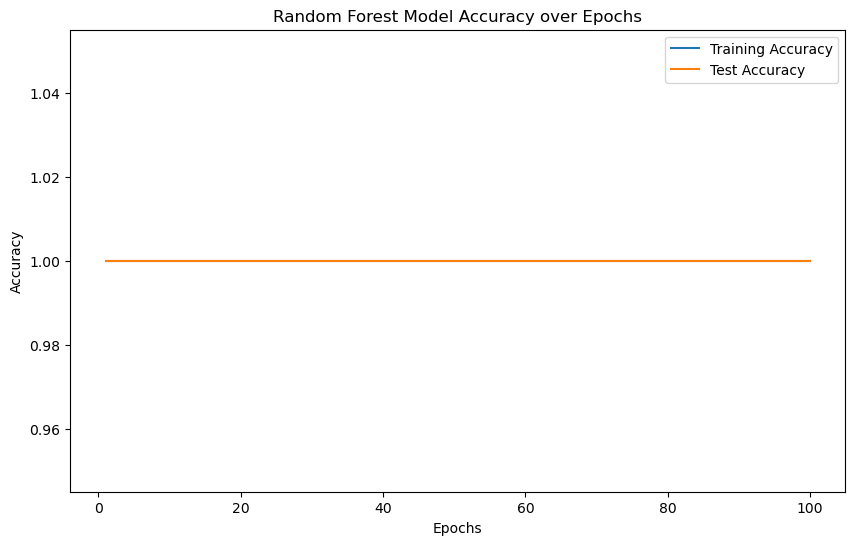

In [7]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 101), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 101), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Random Forest Model Accuracy over Epochs')
plt.legend()
plt.show()

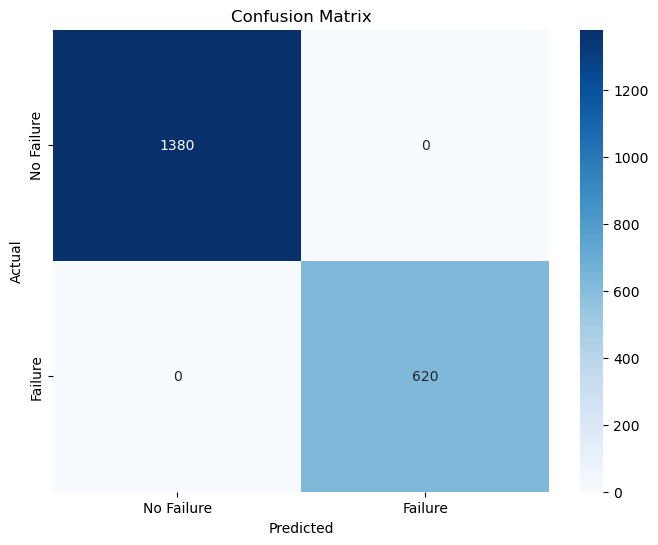

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1380
           1       1.00      1.00      1.00       620

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [8]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_pred)

# Plotting confusion matrix
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Detailed Classification Report
print("Classification Report:\n", classification_report(y_test, test_pred))

In [2]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier

# Load data from CSV
data = pd.read_csv('data.csv')

# Assuming the last column is the target variable ('fans_on')
X = data[['temperature', 'noise', 'gas', 'smoke', 'vibration']]  # Feature columns
y = data['fan_status']  # Target column (fan status: 0 = OFF, 1 = ON)

# Train a RandomForest model
model = RandomForestClassifier()

# Fit the model to the data
model.fit(X, y)

# Save the trained model to a file
joblib.dump(model, 'fan_prediction_model.pkl')

print("Model trained and saved successfully!")


Model trained and saved successfully!
